# iris(アヤメ)のデータを読み込みから、モデルを作成まで
- irisのデータを読み込む
- 散布図行列を使ってデータの特性を可視化
- irisデータから、トレーニングデータとテストデータを分ける
- LinearRegression(最小二乗線形回帰) でモデルを作成する
- モデルの評価(スコア)をする

In [1]:
#irisのデータを読み込む
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()

#読み込んだirisのデータをDataFrameに変換する
df = pd.DataFrame(iris.data, columns=iris.feature_names)

#irisの判別結果を、「target」カラムを作り格納
#散布図行列に出力するため
df['target'] = iris.target


In [2]:
#データの特性の確認
df.describe()
#print(iris.DESCR)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [3]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


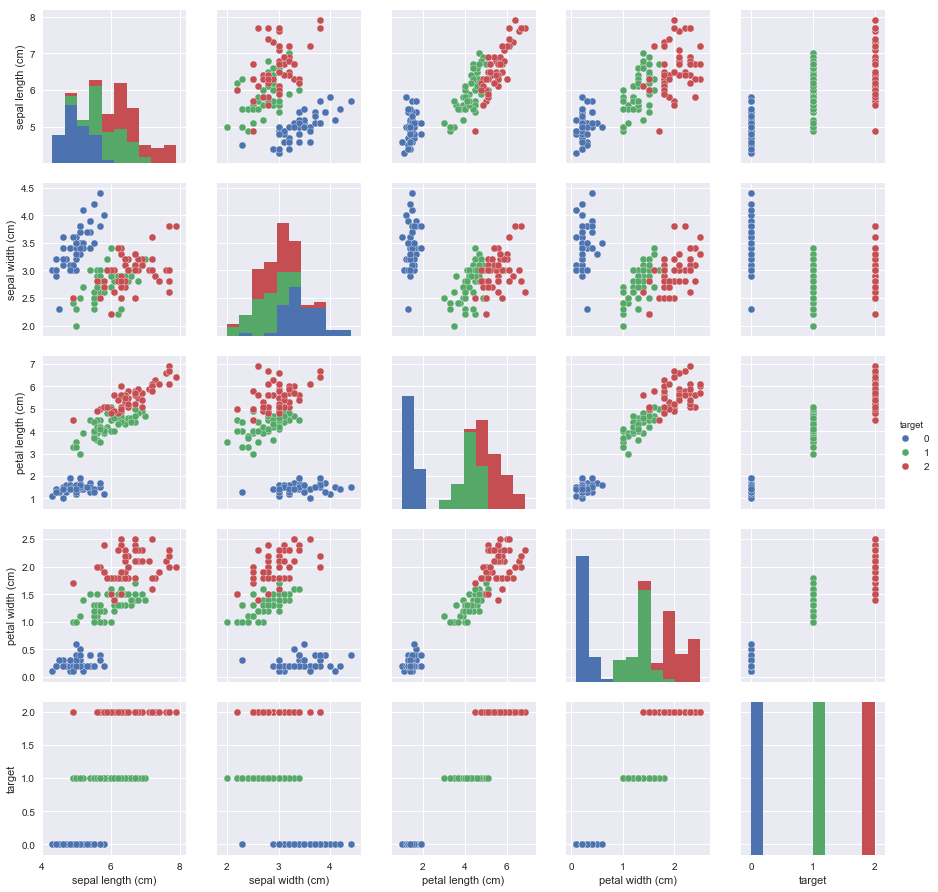

In [8]:
#データの可視化をしてみる
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#散布図行列の表示
#答えとなるtargetを色で区別できる(分類)しておく
sns.pairplot(df,hue='target')



In [ ]:
#散布図を詳細に見るときにつかう
plt.scatter(df["sepal length (cm)"], df["target"])  # 散布図のプロット

In [5]:
#ここから機械学習で
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

#説明変数の取得
# iris.target以外
data_x =  df.iloc[:, :-1]

#目的変数の取得
# iris.targetの部分
data_y = df.iloc[:, -1]

#データを分ける
#訓練データ8割　テストデータ2割で分割する
train_x,test_x,train_y,test_y = train_test_split(data_x,data_y, test_size = 0.2)

#モデルLinearRegressionを選択する
model = LinearRegression()

#訓練データを使って学習する
model.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
#テストデータを使って、解答を予測する
model.predict(test_x) 

#モデルを評価する(２つの関数は、どっちも同じ値になる)
#1.0に近づくほど、精度の高いモデルと言える
print(model.score(test_x,test_y))  
print(r2_score(test_y,   model.predict(test_x)))


0.927494264103
0.927494264103
